In [1]:
import numpy as np
from numpy import array

from qiskit.quantum_info import Statevector
from numpy import sqrt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city

# Single systems

Classical information serves as a familiar point of reference when studying quantum information, as well as a source of analogy that goes a surprisingly long way. It is common that people ask questions about quantum information that have natural classical analogs — often with simple answers that can provide both clarity and insight into the original questions about quantum information. Indeed, it is not at all unreasonable to claim that one cannot truly understand quantum information without understanding classical information.

Suppose that we have a system that stores information. More specifically, let's assume that this system can be in one of a finite number of classical states at each instant. Here, the term "classical state" should be understood in intuitive terms, as a configuration that can be recognized and described unambiguously.

The archetypal example, which we will come back to repeatedly, is that of a bit, which is a system whose classical states are 
$\bar{0}$ and $\bar{1}$. This system can only be understood as a classical state, if it $\textbf{is}$ either $\bar{0}$ or $\bar{1}$.

Let's look at it again though. Let's say that we are not sure that the state of the system is for sure $\bar{0}$ or $\bar{1}$, we only know the probabilities of each outcome, say we have a probability distribution of P($\bar{0}$)=.8 and P($\bar{1}$)=.2. By quantum mechanics we can say that now our system should be in a distribution of these two basis states at all times, because when we measure the system we will get either one of them with assigned probabilities (for n number of measurements where n -> $\infty$), we will get the defined probability distribution. This is a simple example of a quantum system that can be in a superposition of states.

A more succinct way to represent this probabilistic state is by a column vector.
\begin{equation}
    \ket{\psi} = \begin{pmatrix} .8 \\ .2 \end{pmatrix}
\end{equation}

where we have introduced a new notation for out state, the so called $\textit{bra-ket}$ notation.

So the essence of quantum information is that quantum systems can exist in a superposition of states, and that measurements can collapse this superposition to a single state, with a certain probability. This is in stark contrast to classical systems, where the state is either in a definite state or not.

In [2]:
ket1 =  np.array([0, 1])    #define statevectors for |0> and |1>
ket2 =  np.array([1, 0])    #basis states for our 2 dimensional system

In [3]:
ket3 = np.add(ket1, ket2)
display('The sum of our states result in the unnormalized state of:',ket3)

ket4 = np.multiply(ket1, ket2)
display('While we can multiply our states to get:',ket4)

'The sum of our states result in the unnormalized state of:'

array([1, 1])

'While we can multiply our states to get:'

array([0, 0])

The states can be added multiplied etc. We see that the sum of our states result in the unnormalized state of $\textit{ket3}$, the unnormalized meaning that the probability amplitudes are not normalized to 1.

The multiplication of our states will result in a null vector which shows the fact that the basis states are orthogonal.

In [4]:
def normalizer(x):
    weight = 0
    for j in x:
        weight = weight + j

    x = np.sqrt(x/weight)

    display(x)
        
normalizer(ket3)

array([0.70710678, 0.70710678])

We have generated a normalizer which will have our vector normalized to 1.

In [5]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


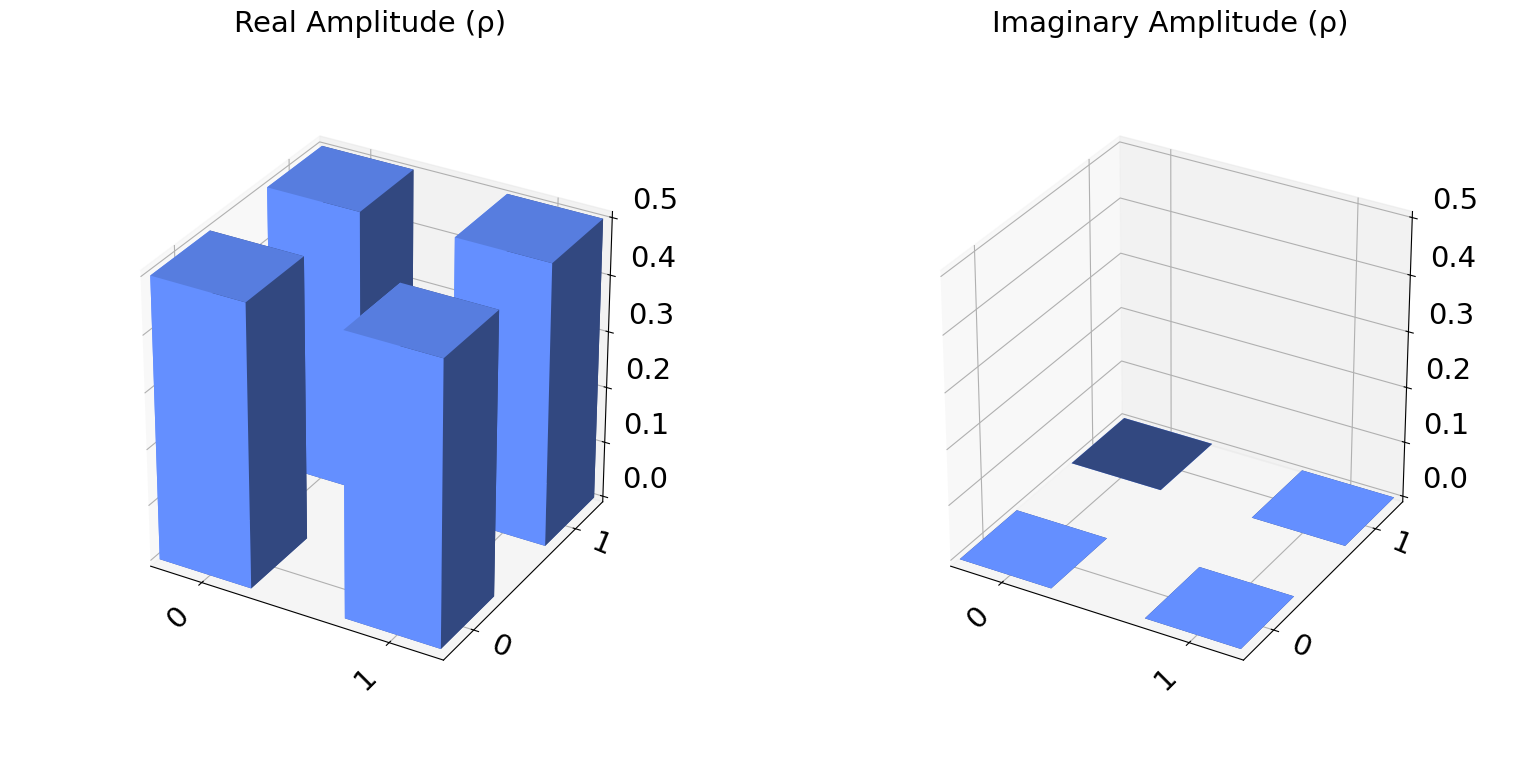

In [6]:
plot_state_city(u)

In [7]:
display(u.draw("latex"))    #latex type output
display(u.draw("text"))     #text output

<IPython.core.display.Latex object>

[0.70710678+0.j,0.70710678+0.j]

In [8]:
display(u.is_valid())
display(w.is_valid())   # checks the validity of the state == wether it is normalized to 1

True

False

Another visualisation of the states is the Bloch sphere representation. where we can visualize the state of our system in a 3D space.

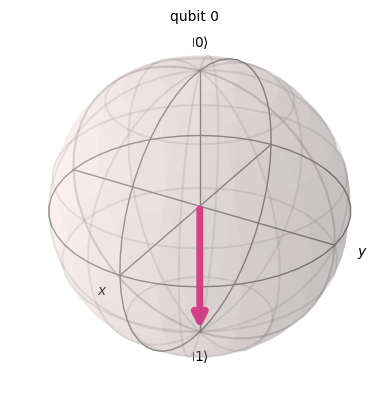

In [9]:
from qiskit.visualization import plot_bloch_multivector
 
plot_bloch_multivector(ket1)


## Measurement


Next let us consider what happens when a quantum state is measured, focusing on a simple type of measurement known as a standard basis measurement.

As we know a state represents a probability distribution of the basis states of our system. When we measure the system, we collapse the state vector to one of the basis states -- or we can say that it will be projected to one of the basis states, with a probability defined by the measured state itself. Hence we call the measurement of quantum systems projective measurement, considering the collapse of the wavefunction.

In [10]:
u.measure() #measure the state vector once and get one of the basis states with 50% prob.

('0',
 Statevector([1.+0.j, 0.+0.j],
             dims=(2,)))

{'0': 52, '1': 48}

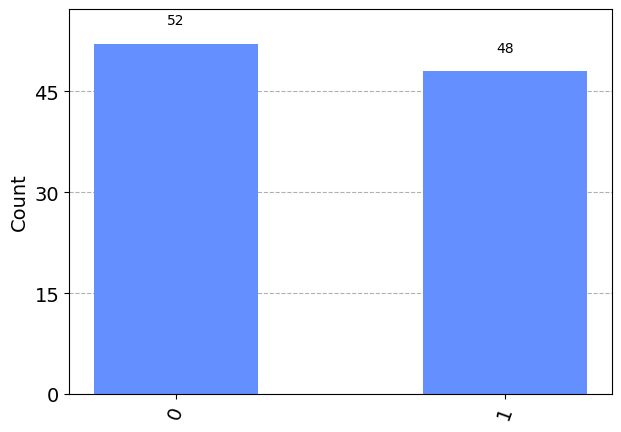

In [11]:
from qiskit.visualization import plot_histogram

statistics = u.sample_counts(100)  #measure the statevector multiple times to visualise a distribution in outcomes
display(statistics) #for high enough mesurements, we can see the distribution of outcomes resemble the definitons of the statevector
plot_histogram(statistics)

{'0': 4899, '1': 5101}

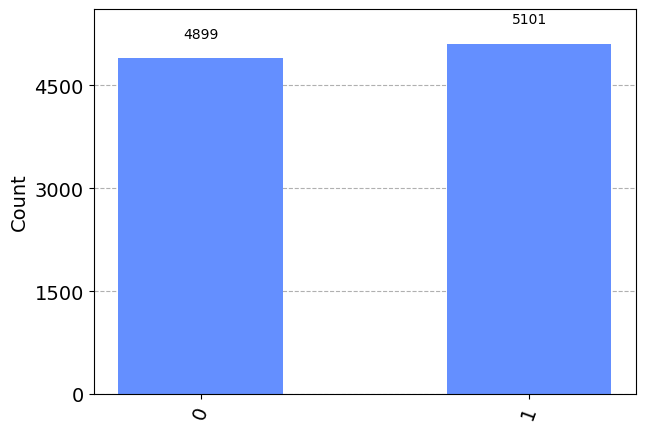

In [12]:
statistics = u.sample_counts(10000)  #measure the statevector multiple times to visualise a distribution in outcomes
display(statistics) #for high enough mesurements, we can see the distribution of outcomes resemble the definitons of the statevector
plot_histogram(statistics)

The more shots we give to the measurement, the more precision will we get the information about the measured vector.

## Unitary operators

Thus far, it may not be evident why quantum information is fundamentally different from classical information. That is, when a quantum state is measured, the probability to obtain each classical state is given by the absolute value squared of the corresponding vector entry — so why not simply record these probabilities in a probability vector?

The answer, at least in part, is that the set of allowable operations that can be performed on a quantum state is different than it is for classical information. Similar to the probabilistic setting, operations on quantum states are linear mappings — but rather than being represented by stochastic matrices as in the classical case, operations on quantum state vectors are represented by unitary matrices.

These matrices act on the states by multiplying them on the left. Let us list a few and show the way they act on our basis state:
1. The Pauli operators (named after Wolfgang Pauli):
   - Identity matrix or sometimes called Pauli-0: $X\ket{0} = \ket{0}$ and $X\ket{1} = \ket{1}$,
   - Pauli-X (or NOT gate): $X\ket{0} = \ket{1}$ and $X\ket{1} = \ket{0}$,
   - Pauli-Y : $Y\ket{0} = -i\ket{1}$ and $Y\ket{1} = i\ket{0}$,
   - Pauli-Z (or Z gate): $Z\ket{0} = \ket{1}$ and $Z\ket{1} = -\ket{1}$, which is the observable corresponding to the spin of a spin-1/2 particle along the z-axis.
   - The matrices in order: 
   \begin{pmatrix} 1 & 0  \\ 0 & 1 \end{pmatrix}  ; \begin{pmatrix} 0 & 1  \\ 1 & 0 \end{pmatrix}   ;   \begin{pmatrix} 0 & i  \\ -i & 0 \end{pmatrix}  ;   \begin{pmatrix} 1 & 0  \\ 0 & -1 \end{pmatrix}

2. Hadamard gate (H) can be represented by the matrix: 
\begin{pmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{pmatrix} 
which acts on the basis states as:
H $\ket{0}$ = $\ket{+}$ and H $\ket{1}$ = $\ket{-}$, where $\ket{+}$ and $\ket{-}$ are the eigenstates of the Pauli-X operator. So it creates a superposition of states.

3. Phase operations $P_{\Theta}$:
\begin{pmatrix} 1 & 0 \\ 0 & e^{i \Theta} \end{pmatrix}
which act on basis states as:
$P_{\Theta} \ket{0} = \ket{0}$ and $P_{\Theta} \ket{1} = e^{i \Theta} \ket{1}$
important examples would be the following:
\begin{equation}
S = P_{\pi / 2} = \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix}
\end{equation}
and
\begin{equation}
T = P_{\pi/4} = \begin{pmatrix} 1 & 0 \\ 0 & \frac{1 + i}{\sqrt{2}} \end{pmatrix}
\end{equation}



## Circuitry

Last in this section let us talk a bit about the quantum circuitry. The quantum circuitry is a way to create and manipulate quantum states, as well as to perform quantum computations. The gates used in building quantum circuits are unitary gates. Now we will show an example of a circuit, manipulating one state, but keep in mind that we can use adiabatically many number (n) of qubits connected via gates of size 1 to n.

In [13]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])   #evolving operators

v = Statevector([1, 0]) #statevector for |0>

#we let the state evolve as the Schrodinger equation evolves it --> U(t) = exp(-i*H*t/hbar) 
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z) #in our case it is just U(t)|v(0)> = |v(t)> where U(t) is the continous application of the operators

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

In [14]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1) #generate a circuit with one qubit

circuit.h(0)    #add gates in the folowing order: 
circuit.t(0)    #Hadamard gate, T gate, Hadamard gate, T gate, and finally a Z gate
circuit.h(0)
circuit.t(0)
circuit.z(0)    

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

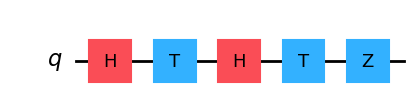

In [15]:
circuit.draw('mpl')

In [16]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")  #we get the same state vector as before but now visualised as a circuit

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

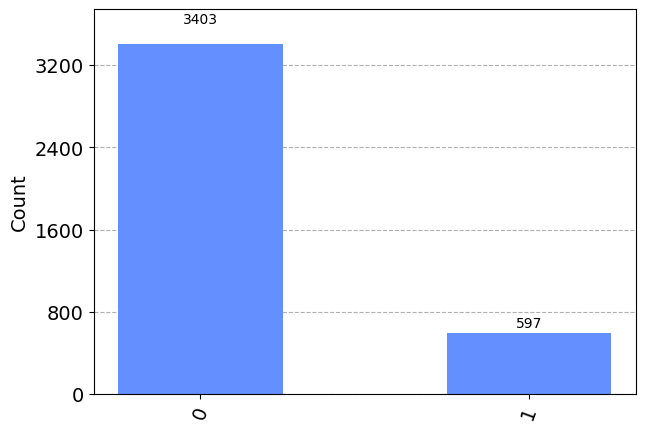

In [17]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)